# What are the effects of LSE's large number of international students on the UK's economy?

## Introduction

## Data Aquisition

### Individual Universities

>First of all, we wanted to show that LSE has one of the highest proportions of international students in the UK. We used a webscraping method to obtain data for every university in the UK in 2020. This data was obtained from the following website, https://www.thecompleteuniversityguide.co.uk/student-advice/where-to-study/international-students-at-uk-universities.

In [1]:
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup

url = "https://www.thecompleteuniversityguide.co.uk/student-advice/where-to-study/international-students-at-uk-universities"
response = requests.get(url)

soup = BeautifulSoup(response.text,'lxml')

section = soup.find_all('td')

university_data = []
percentage = []
percentage_cleaned = []
universities = []

for item in section:
    university_data.append(str(item))



for i in range(len(university_data)):
    percent = university_data[i]
    if i % 2 == 0:
        location = percent.split('"')
        universities.append(location[7].strip(' '))
    else:
        percentage.append(percent[4:7])
       
for value in percentage:
       
    percentage_cleaned.append(float(value.strip('%<')))
    
data_dictionary = {'University': universities, 'Percentage of international students': percentage_cleaned}
percentage_of_international_students = pd.DataFrame.from_dict(data_dictionary)

percentage_of_international_students

,University,Percentage of international students
0,Aberdeen,28.0
1,Abertay,12.0
2,Aberystwyth,18.0
3,AECC University College,36.0
4,Anglia Ruskin,14.0
...,...,...
145,Worcester,8.9
146,Wrexham Glyndwr,3.8
147,Writtle University College,5.9
148,York,14.0


>We then downloaded data from https://public.tableau.com/app/profile/migobs/viz/InternationalstudentsintheUK2022/2, about the chnages in the proportion of international students in the UK every year since 1994 and loaded it into a dataframe.

### International Student Data

In [2]:
percentage_international_in_UK = pd.read_csv('Data/UK_proportion_of_international_students.csv')
percentage_international_in_UK

,Year,Percentage of international students UK(%)
0,1994/95,10
1,1995/96,11
2,1996/97,11
3,1997/98,11
4,1998/99,12
5,1999/2000,12
6,2000/01,12
7,2001/02,12
8,2002/03,13
9,2003/04,13


>We then used the following websites, https://www.prosperityforamerica.org/international-students-in-the-us/#:~:text=In%202021%2D22%20there%20are,the%20U.S%20in%202020%2D21, https://educationdata.org/college-enrollment-statistics, to obtain data for total enrollment in the USA and the total number of international students in the USA year by year. 

In [3]:
USA_total_enrollment = pd.read_csv('Data/USA_total_enrolment.csv')
USA_total_enrollment.head(10)

,Year,Total Enrollment USA,% Public Institution Enrollment
0,2022,20031000,73.7%
1,2021,20327000,73.7%
2,2020,18991798,73.0%
3,2019,19630178,73.9%
4,2018,19651412,74.0%
5,2017,19778151,73.7%
6,2016,19846904,73.5%
7,2015,19988204,72.9%
8,2014,20209092,72.5%
9,2013,20376677,72.4%


In [4]:
number_of_internationals_in_USA = pd.read_csv('Data/USA_number_of_international_students.csv')
number_of_internationals_in_USA.head(10)

,Year,Number of International Students in the US
0,2003-04,572509
1,2004-05,565039
2,2005-06,564766
3,2006-07,582984
4,2007-08,623805
5,2008-09,671616
6,2009-10,690923
7,2010-11,723277
8,2011-12,764495
9,2012-13,819644


### LSE Students Data - Domestic and International

Collected data on Domestic Students and International Students at the LSE. 

Domestic Students at LSE from Academic Year 2014/2015 to 2021/2022

In [5]:
Total_2014_2015 = pd.read_csv('Students_Data/Total_Students/Total_2014-2015.csv', skiprows = 15)
Total_2015_2016 = pd.read_csv('Students_Data/Total_Students/Total_2015-2016.csv', skiprows = 15)
Total_2016_2017 = pd.read_csv('Students_Data/Total_Students/Total_2016-2017.csv', skiprows = 15)
Total_2017_2018 = pd.read_csv('Students_Data/Total_Students/Total_2017-2018.csv', skiprows = 15)
Total_2018_2019 = pd.read_csv('Students_Data/Total_Students/Total_2018-2019.csv', skiprows = 15)
Total_2019_2020 = pd.read_csv('Students_Data/Total_Students/Total_2019-2020.csv', skiprows = 15)
Total_2020_2021 = pd.read_csv('Students_Data/Total_Students/Total_2020-2021.csv', skiprows = 15)
Total_2021_2022 = pd.read_csv('Students_Data/Total_Students/Total_2021-2022.csv', skiprows = 15)

Domestic_2014_2015 = Total_2014_2015[['Total UK  ']]
Domestic_2015_2016 = Total_2015_2016[['Total UK  ']]
Domestic_2016_2017 = Total_2016_2017[['Total UK  ']]
Domestic_2017_2018 = Total_2017_2018[['Total UK  ']]
Domestic_2018_2019 = Total_2018_2019[['Total UK  ']]
Domestic_2019_2020 = Total_2019_2020[['Total UK  ']]
Domestic_2020_2021 = Total_2020_2021[['Total UK  ']]
Domestic_2021_2022 = Total_2021_2022[['Total UK  ']]

Total_UK = pd.concat([Domestic_2014_2015, Domestic_2015_2016,Domestic_2016_2017,Domestic_2017_2018,Domestic_2018_2019,Domestic_2019_2020,Domestic_2020_2021,Domestic_2021_2022], axis=0)
Total_UK['Total UK  '] = Total_UK['Total UK  '].str.replace(',', '').astype(int)
Total_UK = Total_UK.reset_index()
Total_UK.drop('index', axis = 1, inplace = True)
Total_UK

,Total UK
0,3545
1,3520
2,3665
3,3740
4,3855
5,3885
6,4430
7,4455


International Students at LSE

In [6]:
import pandas as pd

intl_df = pd.read_csv('Students_Data/Total_Students/Total_International.csv', skiprows=15)
intl_df.drop('Unnamed: 2', axis = 1, inplace = True)
intl_df['Total International Students'] = intl_df['Total International Students'].astype(int)
intl_df

,Year,Total International Students
0,2014-2015,7055
1,2015-2016,6920
2,2016-2017,7545
3,2017-2018,7885
4,2018-2019,8000
5,2019-2020,8170
6,2020-2021,9030
7,2021-2022,8520


### UK and USA GDP data

>We then used https://www.ons.gov.uk/economy/grossdomesticproductgdp/timeseries/ihyp/pn2 and https://www.macrotrends.net/countries/USA/united-states/gdp-growth-rate to download data about GDP in the UK and USA year by year respectively.

In [7]:
UK_GDP_growth = pd.read_csv('Data/GDP_UK.csv')
UK_GDP_growth

,Year,GDP growth UK(%)
0,1949,3.4
1,1950,3.4
2,1951,3.7
3,1952,1.5
4,1953,5.4
...,...,...
69,2018,1.7
70,2019,1.6
71,2020,-11.0
72,2021,7.6


In [8]:
USA_GDP_growth = pd.read_csv('Data/USA_GDP.csv')
USA_GDP_growth.head(10)

,Year,GDP Growth USA(%),Annual Change
0,2021,5.95%,8.71%
1,2020,-2.77%,-5.06%
2,2019,2.29%,0.65%
3,2018,2.95%,0.70%
4,2017,2.24%,0.7%
5,2016,1.67%,-1.4%
6,2015,2.71%,0.42
7,2014,2.29%,0.45%
8,2013,1.84%,-0.44%
9,2012,2.28%,0.73%


## Data Cleaning

In [9]:
percentage_of_international_students = percentage_of_international_students.sort_values('Percentage of international students', ascending = False)
percentage_of_international_students_top_5 = percentage_of_international_students.head(5)
percentage_of_international_students_top_5

,University,Percentage of international students
77,London School of Economics,54.0
134,University College London,54.0
59,Imperial College London,49.0
137,"University of the Arts, London",47.0
107,Royal College of Music,45.0


>The following section shows how we restructured the dataframes too allow us too plot the GDP against the proportion of international students.

In [56]:
percentage_international_in_UK['Year'] = percentage_international_in_UK['Year'].astype(str)
percentage_international_in_UK['Year'] = percentage_international_in_UK['Year'].str[0:4]
percentage_international_in_UK['Year'] = percentage_international_in_UK['Year'].astype(int)
percentage_international_in_UK.head(5)

,Year,Percentage of international students UK(%)
0,1994,10
1,1995,11
2,1996,11
3,1997,11
4,1998,12


>We merge together both of the UK dataframes to get Percentage of international students in the UK and UK GDP growth in the same dataframe so we can plot them.

In [57]:
UK = pd.merge(percentage_international_in_UK, UK_GDP_growth, how='inner', on='Year')
UK.head(5)

,Year,Percentage of international students UK(%),GDP growth UK(%)
0,1994,10,3.5
1,1995,11,2.1
2,1996,11,1.9
3,1997,11,4.5
4,1998,12,3.2


>We do the same thing for the USA.

In [12]:
number_of_internationals_in_USA['Year'] = number_of_internationals_in_USA['Year'].astype(str)
number_of_internationals_in_USA['Year'] = number_of_internationals_in_USA['Year'].str[0:4]
number_of_internationals_in_USA['Year'] = number_of_internationals_in_USA['Year'].astype(int)

>We use a smiliar approach to obtain a similar dataframe here for the USA but we now have two seperate columns for total enrollment and international student enrollment so we divide the number of internationals by the total to obtain the proportion of internationals for each year.

In [13]:
USA = pd.merge(USA_total_enrollment, number_of_internationals_in_USA, how='inner', on='Year')
USA['Proportion of international students(%)'] = (USA['Number of International Students in the US']/USA['Total Enrollment USA']) * 100
USA = pd.merge(USA, USA_GDP_growth, how='inner', on='Year')
USA = USA.drop(['Total Enrollment USA', 'Number of International Students in the US', 'Annual Change'], axis = 1)
USA['GDP Growth USA(%)'] = USA['GDP Growth USA(%)'].str[0:4]
USA['GDP Growth USA(%)'] = USA['GDP Growth USA(%)'].astype(float)
USA

,Year,% Public Institution Enrollment,Proportion of international students(%),GDP Growth USA(%)
0,2021,73.7%,4.666301,5.95
1,2020,73.0%,4.813104,-2.70
2,2019,73.9%,5.478789,2.29
3,2018,74.0%,5.573640,2.95
4,2017,73.7%,5.535361,2.24
5,2016,73.5%,5.435719,1.67
6,2015,72.9%,5.222275,2.71
7,2014,72.5%,4.824195,2.29
8,2013,72.4%,4.348364,1.84
9,2012,72.1%,3.970282,2.28


### Complete DataFrame of LSE's International and Domestic Students

Created a complete dataframe that has both international students and domestic students and the total. As done before, the astype of all the column values are integers so now we can work with this data on graphs.

In [15]:
## Merge the International Students Dataframe with the UK students dataframe

df_lse = pd.concat([intl_df, Total_UK], axis = 1)
df_lse = df_lse.rename(columns={'Total UK  ': 'Total Domestic Students'})
df_lse['Total Students'] = df_lse['Total International Students'] + df_lse['Total Domestic Students']
df_lse

,Year,Total International Students,Total Domestic Students,Total Students
0,2014-2015,7055,3545,10600
1,2015-2016,6920,3520,10440
2,2016-2017,7545,3665,11210
3,2017-2018,7885,3740,11625
4,2018-2019,8000,3855,11855
5,2019-2020,8170,3885,12055
6,2020-2021,9030,4430,13460
7,2021-2022,8520,4455,12975


## Combining Students with GDP Growth of UK

As we only have data of the proportion of LSE students from Academic Years 2014/2015 to 2021/2022, i will be visualise it below using various methods including line graphs, scatter plot or bar chart and combining these. Also, if i see any outliers, i will attempt to clean the data so that there is no signficant effect on our visualisation and analysis. I will also be adding a proportion column. 

In [72]:
UK_GDP_growth_custom = UK_GDP_growth.loc[66:73]
UK_GDP_growth_custom_1 = UK_GDP_growth_custom.copy()
UK_GDP_growth_custom_1.drop('Year', axis = 1, inplace = True)
UK_GDP_growth_custom_1 = UK_GDP_growth_custom_1.reset_index(drop = True)

df_gdp_lse_students = pd.concat([df_lse, UK_GDP_growth_custom_1], axis = 1)

df_gdp_lse_students['International Proportion'] = df_gdp_lse_students['Total International Students'] / df_gdp_lse_students['Total Students']
df_gdp_lse_students

,Year,Total International Students,Total Domestic Students,Total Students,GDP growth UK(%),International Proportion
0,2014-2015,7055,3545,10600,2.4,0.665566
1,2015-2016,6920,3520,10440,2.2,0.662835
2,2016-2017,7545,3665,11210,2.4,0.673060
3,2017-2018,7885,3740,11625,1.7,0.678280
4,2018-2019,8000,3855,11855,1.6,0.674821
5,2019-2020,8170,3885,12055,-11.0,0.677727
6,2020-2021,9030,4430,13460,7.6,0.670877
7,2021-2022,8520,4455,12975,4.0,0.656647


As this data frame is small, i need to clean data that are outliers. From 2019-2020, there was a -11 percent GDP change and this was caused by the coronavirus pandemic. Therefore, we need to remove this as this is not impacted by students from the UK.

In [111]:
df_gdp_lse_students_cleaned = df_gdp_lse_students.drop([5,6,7], axis = 0, inplace = False)
df_gdp_lse_students_cleaned

,Year,Total International Students,Total Domestic Students,Total Students,GDP growth UK(%),International Proportion
0,2014-2015,7055,3545,10600,2.4,0.665566
1,2015-2016,6920,3520,10440,2.2,0.662835
2,2016-2017,7545,3665,11210,2.4,0.673060
3,2017-2018,7885,3740,11625,1.7,0.678280
4,2018-2019,8000,3855,11855,1.6,0.674821


## Data visualisation

<AxesSubplot:title={'center':'Universities with most international students'}, xlabel='University'>

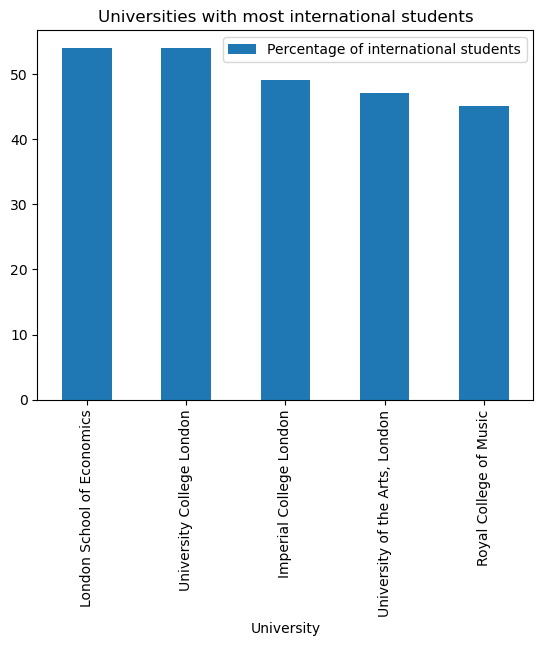

In [16]:
percentage_of_international_students_top_5.plot.bar(x = 'University', title='Universities with most international students')

>We can see above that LSE had the joint top highest proportion of international students in the UK in 2020 at 54%.

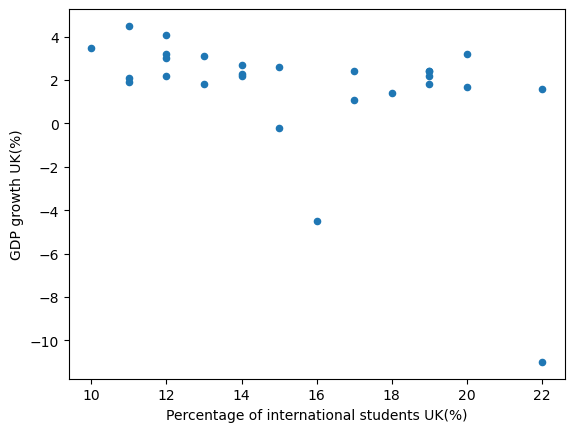

In [17]:
UK.plot.scatter('Percentage of international students UK(%)', 'GDP growth UK(%)');

>We can see above that there appears to be a slight negative correlation between the two varibales, shwoing GDP growth decreasing as the percentage of international students increases. 

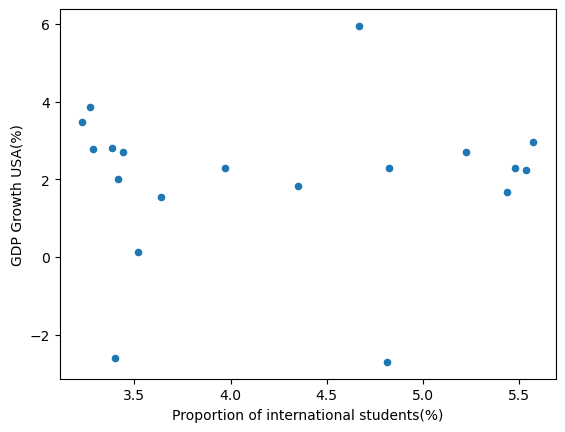

In [101]:
USA.plot.scatter('Proportion of international students(%)', 'GDP Growth USA(%)');

>We can see here that there appears to be less of a correlation between these two variables in the USA. This suggests the possibility of specific policies in the UK on international students or other factors that may be unique to the UK to cause this relationship.

### Visualising Relationship between International Proportion of LSE Students & GDP

After filtering and cleaning the data from outliers, we can beging visualising specifically the impacts of LSE students on GDP. Although this test may not seem quite relevant, it can show the relationship between top universities and the effects of bachelor students on the wider economy. 

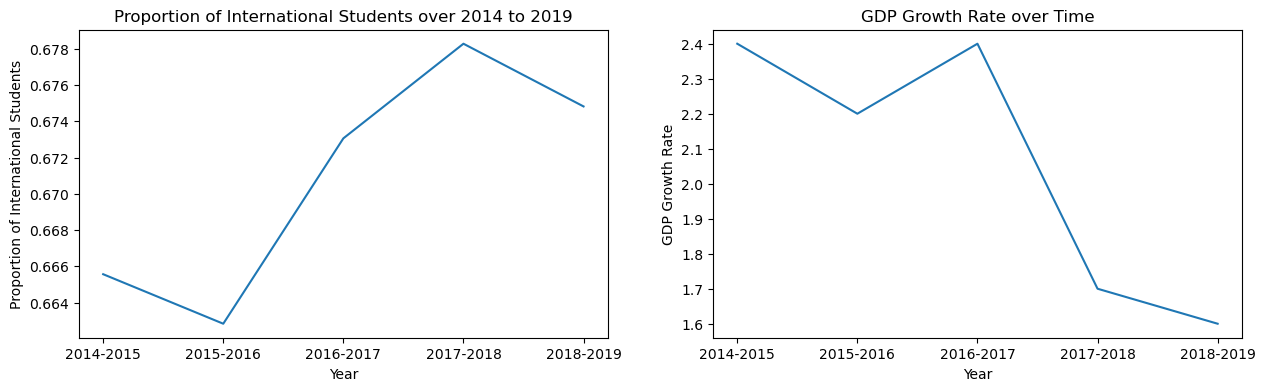

In [113]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 4), sharex=True)

ax_1.plot(df_gdp_lse_students_cleaned['Year'], df_gdp_lse_students_cleaned['International Proportion'])
ax_1.set_xlabel('Year')
ax_1.set_ylabel('Proportion of International Students')
ax_1.set_title('Proportion of International Students over 2014 to 2019')

ax_2.plot(df_gdp_lse_students_cleaned['Year'], df_gdp_lse_students_cleaned['GDP growth UK(%)'])
ax_2.set_xlabel('Year')
ax_2.set_ylabel('GDP Growth Rate')
ax_2.set_title('GDP Growth Rate over Time')


plt.show()

The line graph above shows a insignificant relationship between proportion of LSE students. This could definitely show that LSE international students may not have a significant impact on GDP of the UK

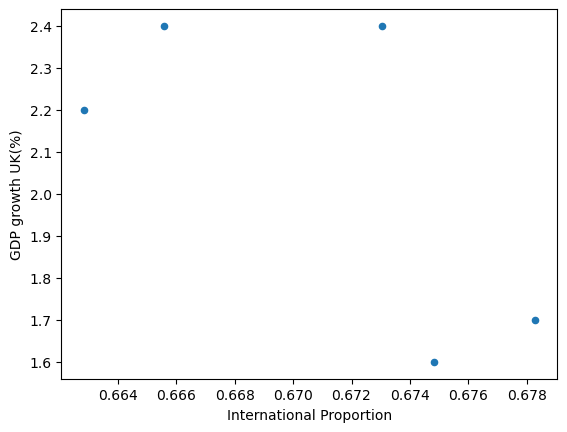

In [114]:
df_gdp_lse_students_cleaned.plot.scatter('International Proportion', 'GDP growth UK(%)');

## Hypothesis tests

### Is LSE's proportion of international students significantly larger than other Universities in England?

>The following hypothesis test is to determine weather there is a significant difference between the average proportion of international students in England and LSE's proportion of international students.

In [ ]:
percentage_of_international_students.describe()

> H0:LSE's proportion of international is not significantly different to the rest of the sample

> H1:LSE has a significantly higher proportion of international students

> √n(x-mean)/SD has t distribution with n-1 degrees freedom.
> In our case, √150(54-16.6)/11.18 = 41.0. We are using the t-distribution with 149 degrees of freedom.

> The probability of getting a value of 41 or higher in this distribtuion is negligible so we can reject H0 at all significance levels. This suggests that LSE does have an significantly larger proportion of international students than other universities

### Is there a correlation between UK GDP growth and the proportion of international students in the UK?

>The following hypothesis test, examines our calculated correlation coefficient to determine weather there is sufficient evidence to suggest a correlation between GDP growth and proportion of international students.

In [ ]:
UK.corr()

>H0: p=0

>H1: p<0

>p(√(n-2)/(1-pp)) is has a t distribution of n-2 degrees of freedom. p = -0.44 and n = 27

>Therefore we use a distribution with 25 degrees of freedom and our test statistic = -2.45

>The probability of obtaining a value less than -2.45 is 0.01082 so we can reject the null hypothesis at the 5% significance level showing that there is sufficient evidence to sufgest a negative correlation between GDP growth and Percentage of international students in the UK.

>The following two hypothesis tests show that there is strong evidence to suggest LSE does have a much higher proportion of international students than most other universities in England and that there may be some evidence to suggest a negative correlation between GDP growth and the proportion of International students in the UK.

## Conclusion